In [1]:
ls

Recursive_IP_tweet.py   appro_ks_IP.npy         run_tagger.sh
Smallest_k.ipynb        bert_util.py            save_feature.py
Smallest_k.py           essay_data/             save_feature.sh
Use_approK.ipynb        model_save_feature/     test_feature_save.npy
Use_approK2.ipynb       new_predictions.npy     test_label_save.npy
__pycache__/            old_predictions.npy     train_feature_save.npy
appro_ks.npy            run_retrain.sh          train_label_save.npy


In [33]:
import numpy as np
import matplotlib.pyplot as plt
new_pred_k = np.load("new_predictions.npy",  allow_pickle=True)
app_k = np.load("appro_ks_IP.npy", allow_pickle=True)
#exact_ks = np.load("exact_ks_IP.npy", allow_pickle=True)
pred = np.load("old_predictions.npy", allow_pickle=True)
np.sum([new_pred_k[i] != None for i in range(new_pred_k.shape[0])])

904

In [34]:
np.mean([i for i in app_k if i != None])

858.0143805309734

In [35]:
new_pred_k.shape

(1000,)

In [17]:
new_pred_k.shape[0]

1000

In [18]:
valid_new_pred_k = [new_pred_k[i] for i in range(new_pred_k.shape[0]) if new_pred_k[i] != None]

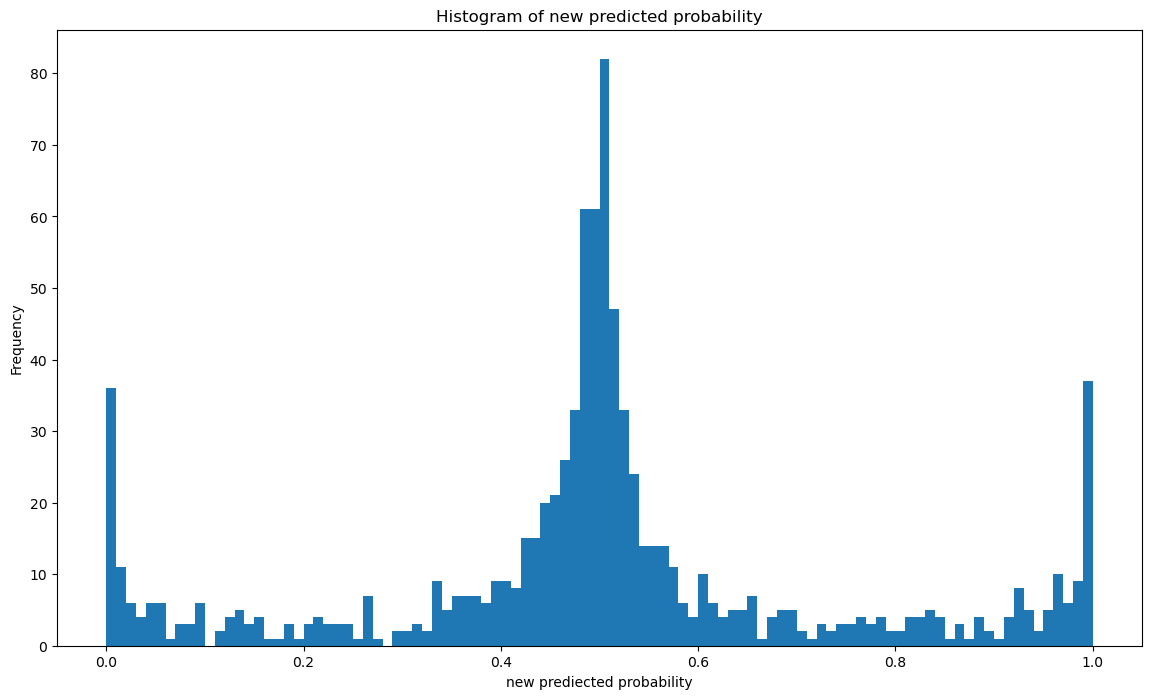

In [19]:
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(valid_new_pred_k, bins=100)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

# How many of them is None

In [20]:
np.sum([app_k[i] != None for i in range(new_pred_k.shape[0])])

904

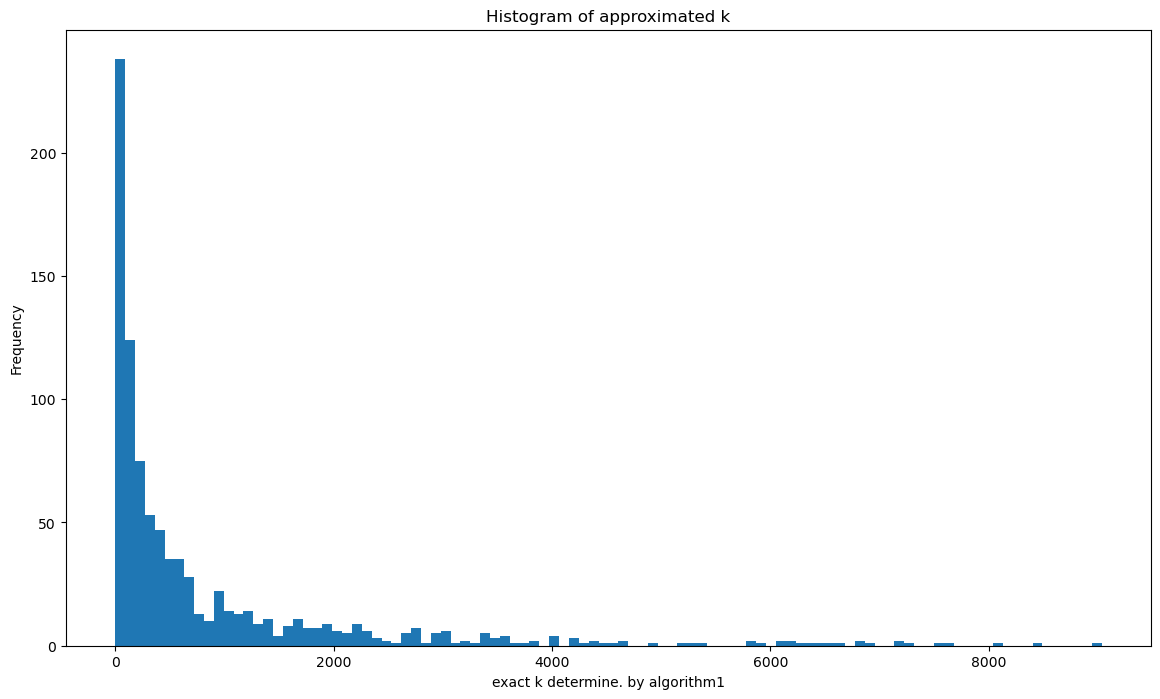

In [21]:
app_k_nonon=[app_k[i] for i in range(new_pred_k.shape[0]) if app_k[i] != None]

plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(app_k_nonon, bins=100)
plt.xlabel("exact k determine. by algorithm1")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k")
plt.show()

# For those are not None, how is the flip

In [22]:
flips = np.zeros((new_pred_k.shape[0], 1))
diff = np.zeros((new_pred_k.shape[0], 1))

#1: flip the label, 0: not flip the label, 2: cannot found k
for i in range(new_pred_k.shape[0]):
    if app_k[i] != None:
        if np.round(pred[i].item()) != np.round(new_pred_k[i].item()):
            flips[i, :] = 1
        else:
            flips[i, :] = 0  
            
        diff[i] = new_pred_k[i] - 0.5
        
        print("old", pred[i].item())
        print("new", new_pred_k[i].item())
        print("appro k", app_k[i])
        print("flip label", flips[i, :])
        print()
        
    else:
        flips[i, :] = 2
        #print("appro k", app_k[i])

old 0.05797460664469548
new 0.9999557662539449
appro k 4172
flip label [1.]

old 0.42315594731322376
new 0.5121741929639311
appro k 78
flip label [1.]

old 0.18714945543539147
new 0.6868215035171469
appro k 465
flip label [1.]

old 0.7746101214106099
new 0.4105046117388845
appro k 544
flip label [1.]

old 0.7274698242234602
new 0.4626776903112362
appro k 468
flip label [1.]

old 0.7194230250495282
new 0.4594010605512647
appro k 320
flip label [1.]

old 0.7588042307754117
new 0.39733008146784426
appro k 368
flip label [1.]

old 0.5205850491846764
new 0.5325279458428768
appro k 6
flip label [0.]

old 0.36147056718605397
new 0.4942426485690906
appro k 107
flip label [0.]

old 0.6113237127376243
new 0.44835162333195533
appro k 47
flip label [1.]

old 0.1840399150582332
new 0.7071791924360713
appro k 962
flip label [1.]

old 0.45953809813735064
new 0.4812535294661075
appro k 26
flip label [0.]

old 0.5143026141485623
new 0.49599156487820684
appro k 8
flip label [1.]

old 0.16953677193653405

In [23]:
# flip the label
num_flip = np.sum([flips[i] == 1 for i in range(new_pred_k.shape[0])])
num_flip

732

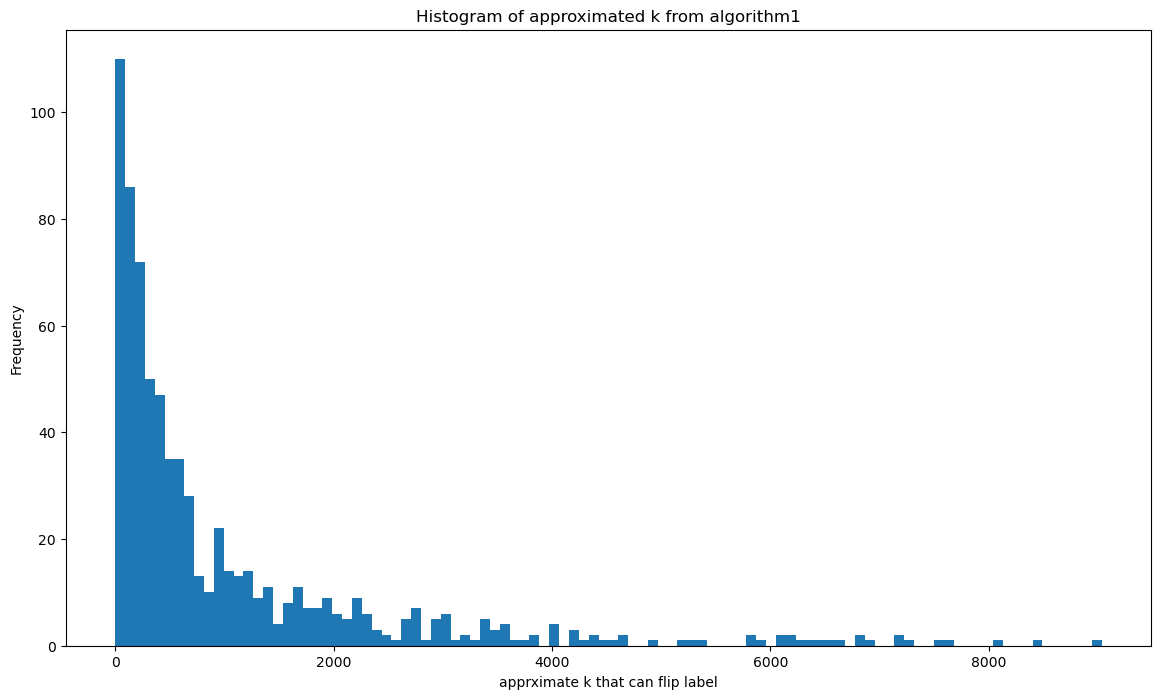

In [24]:

flip_idx = [i for i in range(new_pred_k.shape[0]) if flips[i] == 1 ]
K_flip = app_k[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

In [25]:
# not flip the label
num_noflip = np.sum([flips[i] == 0 for i in range(new_pred_k.shape[0])])
num_noflip

172

In [26]:
num_nok = np.sum([flips[i] == 2 for i in range(new_pred_k.shape[0])])
num_nok

96

In [27]:
# diff for those flip the lable
diff1=[diff[i] for i in range(new_pred_k.shape[0]) if flips[i] == 1]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.19219579205585574, 0.032845512944347045)

In [28]:
# diff for those cannot flip the lable
diff0=[diff[i] for i in range(new_pred_k.shape[0]) if flips[i] == 0]
np.mean(np.abs(diff0)), np.var(np.abs(diff0))

(0.015122140715327477, 0.00019526106135346434)

In [29]:
index1 = [i for i in range(new_pred_k.shape[0]) if flips[i] == 1]

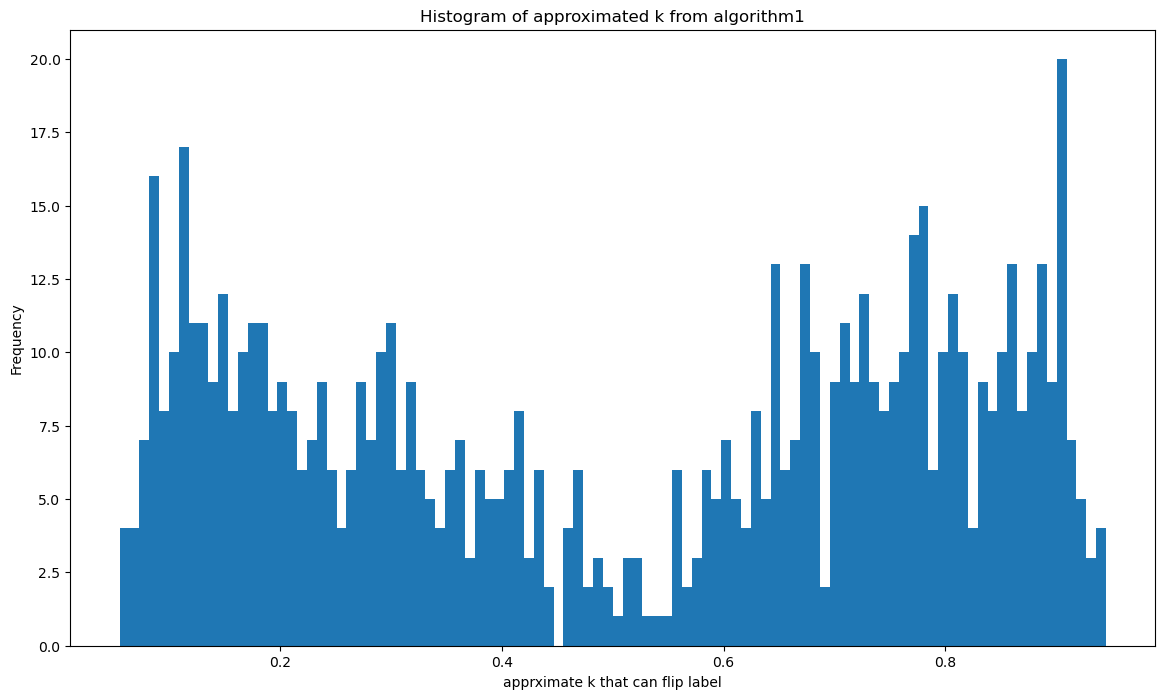

In [30]:

# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(pred[index1], bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

In [31]:
index10 = [i for i in range(new_pred_k.shape[0]) if flips[i] == 1 or 0]

In [32]:
np.array(index10)

array([  0,   1,   2,   3,   4,   5,   6,   9,  10,  12,  13,  16,  17,
        18,  20,  22,  23,  24,  26,  27,  29,  31,  33,  34,  36,  37,
        38,  40,  42,  43,  44,  46,  47,  48,  49,  50,  51,  54,  55,
        56,  58,  59,  60,  61,  63,  64,  65,  67,  68,  69,  70,  72,
        73,  74,  75,  76,  77,  79,  81,  82,  83,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 103,
       104, 105, 107, 108, 109, 111, 114, 116, 117, 118, 119, 120, 121,
       122, 124, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 139,
       140, 141, 143, 145, 146, 148, 149, 151, 153, 154, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 189, 191, 192, 193, 197, 198, 199, 200, 202, 204, 207,
       209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
       223, 224, 227, 228, 231, 234, 235, 239, 240, 241, 244, 24

# not always underestimate?

# exact k is smaller

# order list

In [3]:
pwd

'/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF/Logistic_SST/IF_lr_fix'